##Vấn đề dữ liệu train và test##
Ta sẽ tạo 2 bộ dữ liệu tách biệt nhau. Hai bộ dữ liệu này tuân theo phân bố chuẩn 2 chiều $N_2(\mu, \sum)$
- Bộ như nhất có: $\mu_1 = [-1,0] $ 
- Bộ nhứ hai có $\mu_2 = [1, 0]$
Cả hai bộ dữ liệu có ma trận hiệp phương sai: $[[0.3, 0.2]; [0.2, 0.3]$
=> hai bộ này tách biệt tuyến tính. 
Mỗi bộ dữ liệu ta tạo 20 quan sát. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Ta mặc định bộ dữ liệu 1 (màu đỏ) có nhãn y = -1. \\
Bộ dữ liệu 2 (màu xanh) có nhãn y = 1. 

In [ ]:
def find_error(w): 
  error = np.zeros((2*N, 1))
  for i in range(2*N):
    if  y[i]*np.dot(Xbar[i], w) < 0: 
      error[i] = 1
  return error



In [ ]:
def update_w(w):
  r = find_error(w)
  count = np.sum(r)
  while count != 0:
    k = -1 # find index of element has value equal 1. 
    for i in range(2*N): 
       if r[i] == 1: 
          k = i
          break
    if k != -1:
        w = w + y[k]*np.reshape(Xbar[k], (-1, 1)) 
        r = find_error(w)
        count = np.sum(r)
  return w


In [ ]:
mean = [[-1, 0], [1,0]]
cov = [[0.3, 0.2], [0.2, 0.3]]
N =50
np.random.seed(22)
X0 = np.random.multivariate_normal(mean[0], cov, N)
X1 = np.random.multivariate_normal(mean[1], cov,N)
X = np.concatenate((X0, X1), axis = 0)
one = np.ones((N, 1))
y = np.concatenate((-one, one), axis = 0)
Xbar = np.concatenate(( np.ones((2*N, 1)), X), axis = 1)
w = np.ones((Xbar.shape[1],1))
w = update_w(w)
print(w)





[[ 1.        ]
 [ 3.04656923]
 [-1.18758022]]


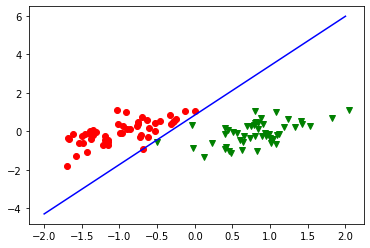

In [ ]:
plt.plot(X0[:, 0], X0[:,1], 'o',label = 'data 1', color = 'red')
plt.plot(X1[:, 0], X1[:,1], 'v', label = 'data 2', color = 'green')
x = np.linspace(-2,2,100)
y = (-w[0] - w[1]*x)/w[2]
plt.plot(x, y, '-b')
plt.show()